<a href="https://colab.research.google.com/github/Jean-yun/Aiffel_project/blob/main/_6_simple_regression_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 단순 선형 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
# 캘리포니아 주택 데이터셋 불러오기
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 단순 회귀 분석을 위해 하나의 독립 변수 선택 (e.g., MedInc)
X = df[['MedInc']]
y = df['target']

In [4]:
# 데이터 분할 - train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 1), (4128, 1), (16512,), (4128,))

## Scikit-Learn

In [5]:
# Scikit-Learn을 사용한 단순 회귀 모델 훈련
model_sklearn = LinearRegression()
# fit
model_sklearn.fit(X_train, y_train)
# model_sklearn
model_sklearn

LinearRegression()

In [6]:
# predict - 테스트 데이터에 대한 예측
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_sklearn

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

<Axes: xlabel='target'>

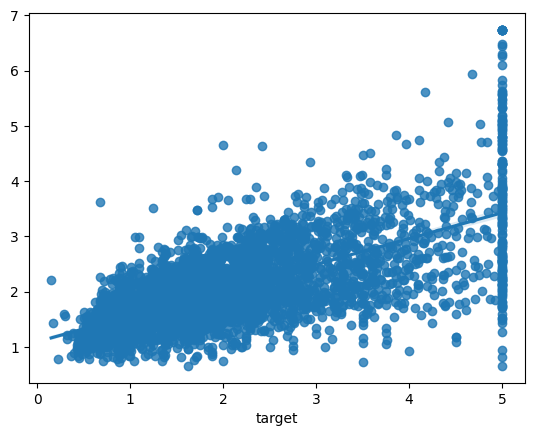

In [7]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred_sklearn)

<Axes: xlabel='target'>

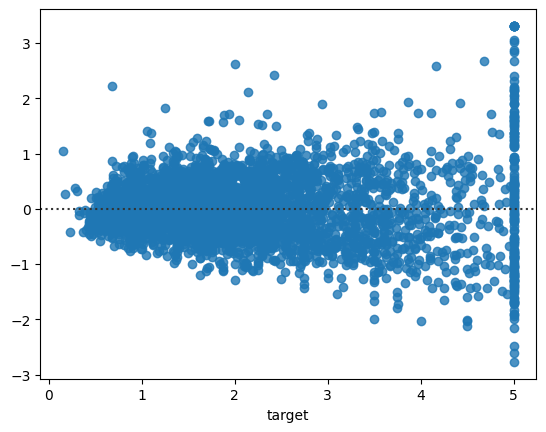

In [8]:
sns.residplot(x=y_test, y=y_pred_sklearn)

### **결정 계수 (R-squared):**

결정 계수는 회귀 분석 모델이 종속 변수의 변동성을 얼마나 잘 설명하는지를 나타내는 통계적 측도로, 다음과 같이 정의됩니다:

\[ $R^2 = 1 - \frac{\text{SSE (Sum of Squared Residuals)}}{\text{SSTO (Total Sum of Squares)}}$ \]

여기서,
- $SSE$는 잔차의 제곱합으로, 모델이 설명하지 못하는 변동을 나타냅니다.
- $SSTO$는 종속 변수의 전체 변동으로, 평균과의 차이의 제곱합으로 이루어져 있습니다.

결정 계수는 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 완벽하게 설명한다는 것을 의미합니다.

* **조정된 결정 계수 (Adjusted R-squared):**

조정된 결정 계수는 결정 계수를 개선한 지표로, 독립 변수의 수에 대한 페널티를 부여하여 모델의 복잡성을 조절합니다. 조정된 결정 계수는 다음과 같이 정의됩니다:

\[ $\text{Adjusted } R^2 = 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1}$ \]

여기서,
- \($n$\)은 샘플의 수,
- \($k$\)는 모델에 포함된 독립 변수의 수입니다.

조정된 결정 계수는 독립 변수의 추가 또는 제거에 따라 변화하며, 모델의 복잡성을 고려하여 결정 계수를 조절합니다. 이는 모델이 추가된 변수가 실제로 유의미한 향상을 가져오는지를 고려하여 모델의 해석력을 향상시킵니다.


In [17]:
# 결정 계수
# R² 계산 함수 정의
def calculate_r_squared(actual, predicted):
    mean_actual = np.mean(actual)
    total_variance = np.sum((actual - mean_actual)**2)
    explained_variance = np.sum((predicted - mean_actual)**2)
    r_squared = 1 - explained_variance / total_variance
    return r_squared

# R² 계산
r_squared = calculate_r_squared(y_test, y_pred_sklearn)
r_squared

0.5250529768840368

In [18]:
y_test.shape, y_pred_sklearn.shape

((4128,), (4128,))

In [19]:
model_sklearn.score(X_test, y_test)

0.45885918903846656

In [ ]:
# r2_score


### MSE

In [20]:
# 모델 평가 - mean_squared_error
# mse_sklearn
mean_squared_error(y_test, y_pred_sklearn)

0.7091157771765549

In [22]:
#MSE  (error -squared- mean)
mse = ((y_test - y_pred_sklearn) ** 2).mean()
mse

0.7091157771765549

In [23]:
#RMSE
np.sqrt(mse)

0.8420901241414455

In [26]:
#RMSE
mse ** 0.5

0.8420901241414455

## Statsmodels

In [27]:
# Statsmodels를 사용한 단순 회귀 모델 훈련
# Statsmodels에서 상수항을 추가 - sm.add_constant
X_train_ols= sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()
model_ols

# model_ols


In [28]:
# 테스트 데이터에 대한 예측
X_test_ols = sm.add_constant(X_test)
y_pred_ols = model_ols.predict(X_test_ols)
y_pred_ols

20046    1.149589
3024     1.506069
15663    1.903937
20484    2.850594
9814     2.006633
           ...   
15362    2.375651
16623    1.587966
18086    4.315008
2144     1.612455
3665     1.934130
Length: 4128, dtype: float64

<Axes: xlabel='target'>

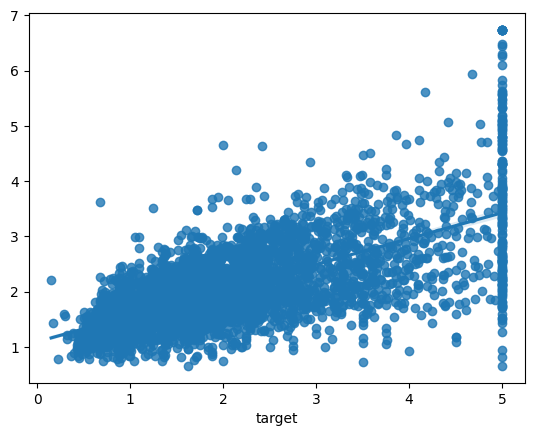

In [29]:
# 시각화: 회귀선과 산점도
sns.regplot(x=y_test, y=y_pred_ols)

In [30]:
# mean_squared_error
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)
mse_ols, r2_ols


(0.7091157771765548, 0.45885918903846656)

In [33]:
# model_ols.summary()
print(model_ols.summary())



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:10:00   Log-Likelihood:                -20475.
No. Observations:               16512   AIC:                         4.095e+04
Df Residuals:                   16510   BIC:                         4.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4446      0.015     30.096      0.0

* **Log-Likelihood (로그 우도):**

    * 로그 우도는 확률 분포의 모수를 추정하는 모델에서 주어진 데이터가 발생할 확률의 로그를 나타냅니다. 일반적으로 최대 로그 우도를 찾는 것이 모델의 적합도를 측정하는 중요한 지표 중 하나입니다. 더 높은 로그 우도는 모델이 주어진 데이터를 더 잘 설명한다는 것을 의미합니다.

\[ $\text{Log-Likelihood} = \sum_{i=1}^{n} \log(f(x_i; \theta))$ \]

여기서,
- \($n$\)은 데이터 포인트의 수,
- \($f(x_i; \theta)$\)는 확률 밀도 함수 또는 확률 질량 함수입니다,
- \($\theta$\)는 모델의 모수를 나타냅니다.



* **AIC (Akaike Information Criterion):**

    * AIC는 모델의 성능을 측정하는 지표 중 하나로, 모델의 적합도와 모델의 복잡성(파라미터 수) 사이의 균형을 제공합니다. AIC는 로그 우도와 모델의 파라미터 수를 고려하여 계산되며, 더 낮은 AIC 값은 더 좋은 모델을 나타냅니다.

* **BIC (Bayesian Information Criterion):**

    * BIC는 AIC와 유사한 목적을 가지고 있지만, 모델의 파라미터 수에 대한 페널티를 더 강조합니다. BIC는 로그 우도와 파라미터 수를 고려하여 계산되며, 더 낮은 BIC 값은 더 좋은 모델을 나타냅니다. AIC와 BIC는 모델 선택 시 고려해야 할 지표 중 하나이며, 적합한 모델을 선택하는 데 도움을 줍니다.



* **F-statistic (F 통계량):**
    * F 통계량은 회귀 모델 전체의 통계적 유의성을 평가하는 데 사용됩니다. 즉, 최소한 하나의 회귀 계수가 0이 아닌지 여부를 검증합니다. F 통계량이 클수록 적어도 하나의 독립 변수가 종속 변수에 유의미한 영향을 미친다는 증거가 더 강력합니다. 따라서 F 통계량이 유의미하면 최소한 하나의 변수는 종속 변수에 영향을 미칩니다.

* **Prob (F-statistic):**
    * Prob (F-statistic)는 F 통계량의 p-value를 나타냅니다. 이 값이 작을수록 회귀 모델 전체가 통계적으로 유의미하다는 것을 나타냅니다. 즉, 적어도 하나의 독립 변수가 종속 변수에 유의미한 영향을 미친다는 귀무 가설을 기각할 수 있는지 여부를 판단하는데 사용됩니다.


* **모델 진단**
    * Omnibus: 잔차의 정규성을 검정하는데 사용됩니다. 이 값이 작을수록 정규성 가정에 더 가깝습니다.
    * Durbin-Watson: 자기상관을 검정하는데 사용됩니다. 보통 1.5에서 2.5 사이의 값이 이상적입니다.
    * Prob(Omnibus): Omnibus 검정의 p-value. 낮을수록 정규성 가정에 위배될 가능성이 높습니다.
    * Jarque-Bera (JB): 잔차의 왜도와 첨도에 대한 검정을 수행합니다. 작을수록 정규성에 가깝습니다.
    * Prob(JB): JB 검정의 p-value. 낮을수록 정규성 가정에 위배될 가능성이 높습니다.
    * Skew (왜도): 왜도가 0에 가까울수록 정규성에 가깝습니다.
    * Kurtosis (첨도): 첨도가 3에 가까울수록 정규성에 가깝습니다.
    * Cond. No.: 다중공선성을 확인하기 위한 조건 지수입니다.
    
* **주의 사항**
    * Covariance Type: nonrobust. 공분산 행렬의 유형으로, 이 경우는 로버스트하지 않음을 의미합니다.
    * Standard Errors assume that the covariance matrix of the errors is correctly specified.
    * 잔차의 공분산 행렬이 정확하게 명시되었다는 가정하에 표준 오차가 계산되었다는 의미입니다.